In [1]:
from data.gen_data import build_X, build_Y, build_XY
from data.gen_data_config import gen_data_config
from evaluation import score
import pandas as pd
import numpy as np
from util import plot_roi, categori_reverse
from model import build_model, build_embed_model
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

Using TensorFlow backend.


In [2]:
def tsne_trans(input):
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
    return tsne.fit_transform(input)

In [3]:
embedding_shape = 32
batch_size = 128
epochs = 300

In [4]:
data_s, data_e = '2001/1/1', '2018/12/31'
target_s, target_e = '2019/1/1', '2019/12/31'
feature_days = 3

In [5]:
sne_dict = {
    'data':{},
    'tar':{}
}
embed_dict = {
    'data':{},
    'tar':{}
}

In [6]:
x, y, data_result = build_XY(data_s, data_e, 
                                 gen_data_config['selected_features'], 
                                 feature_days)
tar_x, tar_y, tar_result = build_XY(target_s, target_e, 
                                 gen_data_config['selected_features'], 
                                 feature_days)

In [7]:
'''for t-SNE'''
feature_day = 1

sne_data, _, _ = build_XY(data_s, data_e, 
                                 ['Open', 'Close'], 
                                 feature_day)
sne_tar, _, _ = build_XY(target_s, target_e, 
                                 ['Open', 'Close'], 
                                 feature_day)
sne_tr_y = []
sne_te_y = []
# data
for r in sne_data:
    if(r[1] > r[0]):
        sne_tr_y.append(0)
    else:
        sne_tr_y.append(1)
# target
for r in sne_tar:
    if(r[1] > r[0]):
        sne_te_y.append(0)
    else:
        sne_te_y.append(1)

In [8]:
print(f'x的shape：{x.shape}')
print(f"一天的k-bar vector長度：{len(gen_data_config['selected_features'])}")

x的shape：(4456, 129)
一天的k-bar vector長度：43


# Task_1

給予t, t-1, t-2的資料作為input預測t-1, t-2

Loss:min(t-1,t-2的RMSE)

In [9]:
task = '1'

In [10]:
'''Data'''
locals()[f'task_{task}_y'] = x[:, len(gen_data_config['selected_features']):]

In [14]:
'''build model'''
model = build_embed_model('dense', 
                           x.shape, 
                           locals()[f'task_{task}_y'].shape, 
                           embedding_shape, 
                          'sigmoid')
sgd = SGD(lr=0.1, momentum=0.1, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error',
                  optimizer=sgd,
                  metrics=['accuracy'])

In [15]:
'''Fit models and use validation_split=0.1 '''
history = model.fit(x, 
                    locals()[f'task_{task}_y'],
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 1s 282us/step - loss: 12718.7048 - accuracy: 0.2219 - val_loss: 9596.8226 - val_accuracy: 0.1726
Epoch 2/300
4010/4010 [==============================] - 0s 69us/step - loss: 12710.5446 - accuracy: 0.2793 - val_loss: 9594.6469 - val_accuracy: 0.1996
Epoch 3/300
4010/4010 [==============================] - 0s 75us/step - loss: 12709.3170 - accuracy: 0.2808 - val_loss: 9594.1722 - val_accuracy: 0.1480
Epoch 4/300
4010/4010 [==============================] - 0s 73us/step - loss: 12708.8045 - accuracy: 0.2546 - val_loss: 9593.4586 - val_accuracy: 0.1726
Epoch 5/300
4010/4010 [==============================] - 0s 73us/step - loss: 12708.4721 - accuracy: 0.2337 - val_loss: 9592.9366 - val_accuracy: 0.2108
Epoch 6/300
4010/4010 [==============================] - 0s 70us/step - loss: 12707.9511 - accuracy: 0.2354 - val_loss: 9592.7951 - val_accuracy: 0.1592
Epoch 7/300
4010/4010 [===========

Epoch 54/300
4010/4010 [==============================] - 0s 72us/step - loss: 12705.7443 - accuracy: 0.0975 - val_loss: 9590.8113 - val_accuracy: 0.1076
Epoch 55/300
4010/4010 [==============================] - 0s 68us/step - loss: 12705.7251 - accuracy: 0.0945 - val_loss: 9590.8583 - val_accuracy: 0.0897
Epoch 56/300
4010/4010 [==============================] - 0s 68us/step - loss: 12705.7382 - accuracy: 0.0925 - val_loss: 9590.8725 - val_accuracy: 0.0807
Epoch 57/300
4010/4010 [==============================] - 0s 74us/step - loss: 12705.7152 - accuracy: 0.0960 - val_loss: 9590.7491 - val_accuracy: 0.0785
Epoch 58/300
4010/4010 [==============================] - 0s 67us/step - loss: 12705.7226 - accuracy: 0.0908 - val_loss: 9590.7658 - val_accuracy: 0.0605
Epoch 59/300
4010/4010 [==============================] - 0s 75us/step - loss: 12705.7434 - accuracy: 0.0883 - val_loss: 9590.7650 - val_accuracy: 0.0740
Epoch 60/300
4010/4010 [==============================] - 0s 69us/step - los

Epoch 160/300
4010/4010 [==============================] - 0s 69us/step - loss: 12705.3913 - accuracy: 0.0504 - val_loss: 9590.4885 - val_accuracy: 0.0336
Epoch 161/300
4010/4010 [==============================] - 0s 69us/step - loss: 12705.4068 - accuracy: 0.0511 - val_loss: 9590.5379 - val_accuracy: 0.0404
Epoch 162/300
4010/4010 [==============================] - 0s 75us/step - loss: 12705.4190 - accuracy: 0.0521 - val_loss: 9590.5333 - val_accuracy: 0.0448
Epoch 163/300
4010/4010 [==============================] - 0s 71us/step - loss: 12705.3833 - accuracy: 0.0479 - val_loss: 9590.5077 - val_accuracy: 0.0381
Epoch 164/300
4010/4010 [==============================] - 0s 66us/step - loss: 12705.3909 - accuracy: 0.0501 - val_loss: 9590.5141 - val_accuracy: 0.0359
Epoch 165/300
4010/4010 [==============================] - 0s 68us/step - loss: 12705.3978 - accuracy: 0.0491 - val_loss: 9590.5009 - val_accuracy: 0.0359
Epoch 166/300
4010/4010 [==============================] - 0s 74us/ste

Epoch 213/300
4010/4010 [==============================] - 0s 70us/step - loss: 12705.3384 - accuracy: 0.0434 - val_loss: 9590.6017 - val_accuracy: 0.0314
Epoch 214/300
4010/4010 [==============================] - 0s 68us/step - loss: 12705.3394 - accuracy: 0.0456 - val_loss: 9590.5078 - val_accuracy: 0.0404
Epoch 215/300
4010/4010 [==============================] - 0s 71us/step - loss: 12705.3187 - accuracy: 0.0441 - val_loss: 9590.4737 - val_accuracy: 0.0314
Epoch 216/300
4010/4010 [==============================] - 0s 70us/step - loss: 12705.3267 - accuracy: 0.0451 - val_loss: 9590.4765 - val_accuracy: 0.0381
Epoch 217/300
4010/4010 [==============================] - 0s 80us/step - loss: 12705.3158 - accuracy: 0.0436 - val_loss: 9590.5412 - val_accuracy: 0.0314
Epoch 218/300
4010/4010 [==============================] - 0s 68us/step - loss: 12705.3277 - accuracy: 0.0444 - val_loss: 9590.4531 - val_accuracy: 0.0336
Epoch 219/300
4010/4010 [==============================] - 0s 67us/ste

Epoch 266/300
4010/4010 [==============================] - 0s 73us/step - loss: 12705.3104 - accuracy: 0.0411 - val_loss: 9590.4232 - val_accuracy: 0.0269
Epoch 267/300
4010/4010 [==============================] - 0s 67us/step - loss: 12705.2848 - accuracy: 0.0387 - val_loss: 9590.4478 - val_accuracy: 0.0269
Epoch 268/300
4010/4010 [==============================] - 0s 69us/step - loss: 12705.2835 - accuracy: 0.0392 - val_loss: 9590.4015 - val_accuracy: 0.0291
Epoch 269/300
4010/4010 [==============================] - 0s 68us/step - loss: 12705.2843 - accuracy: 0.0397 - val_loss: 9590.4200 - val_accuracy: 0.0314
Epoch 270/300
4010/4010 [==============================] - 0s 68us/step - loss: 12705.2841 - accuracy: 0.0399 - val_loss: 9590.4241 - val_accuracy: 0.0359
Epoch 271/300
4010/4010 [==============================] - 0s 84us/step - loss: 12705.2933 - accuracy: 0.0382 - val_loss: 9590.4444 - val_accuracy: 0.0426
Epoch 272/300
4010/4010 [==============================] - 0s 74us/ste

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               66560     
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)              

In [17]:
'''get embedding output'''
'''get embedding output'''
get_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[16].output])
embed_dict['data'][task] = get_layer_output([x])[0]
embed_dict['tar'][task] = get_layer_output([tar_x])[0]

In [18]:
'''data t-SNE'''
sne_dict['data'][task]  = tsne_trans(embed_dict['data'][task])
sne_dict['tar'][task] = tsne_trans(embed_dict['tar'][task])

# Task_2a
分類 t+1 是上漲或下跌

In [19]:
task = '2a'

In [20]:
feature_day = 0
task_2a, _, _ = build_XY(data_s, data_e, 
                                 ['Open', 'Close'], 
                             feature_day)

task_2a_y = []
for r in task_2a:
    if(r[1] > r[0]):
        task_2a_y.append(0)
    else:
        task_2a_y.append(1)
task_2a_y = keras.utils.to_categorical(task_2a_y, 2)

In [21]:
'''build model'''
model = build_embed_model('dense', x.shape, task_2a_y.shape, 
                                 embedding_shape, 'softmax')
model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [22]:
'''Fit models and use validation_split=0.1 '''
history = model.fit(x, 
                    task_2a_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 1s 332us/step - loss: 0.8239 - accuracy: 0.4905 - val_loss: 0.8755 - val_accuracy: 0.4529
Epoch 2/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.7151 - accuracy: 0.5227 - val_loss: 0.7655 - val_accuracy: 0.4933
Epoch 3/300
4010/4010 [==============================] - 0s 85us/step - loss: 0.6849 - accuracy: 0.5581 - val_loss: 0.7552 - val_accuracy: 0.4753
Epoch 4/300
4010/4010 [==============================] - 0s 77us/step - loss: 0.6803 - accuracy: 0.5688 - val_loss: 0.7087 - val_accuracy: 0.5314
Epoch 5/300
4010/4010 [==============================] - 0s 78us/step - loss: 0.6718 - accuracy: 0.5830 - val_loss: 0.7152 - val_accuracy: 0.5538
Epoch 6/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.6682 - accuracy: 0.5808 - val_loss: 0.7157 - val_accuracy: 0.5224
Epoch 7/300
4010/4010 [==============================] - 0s 79us/step - loss

Epoch 112/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.1307 - accuracy: 0.9491 - val_loss: 2.0433 - val_accuracy: 0.5067
Epoch 113/300
4010/4010 [==============================] - 0s 83us/step - loss: 0.1232 - accuracy: 0.9554 - val_loss: 1.8936 - val_accuracy: 0.5224
Epoch 114/300
4010/4010 [==============================] - 0s 82us/step - loss: 0.1093 - accuracy: 0.9611 - val_loss: 1.8978 - val_accuracy: 0.5000
Epoch 115/300
4010/4010 [==============================] - 0s 86us/step - loss: 0.1234 - accuracy: 0.9519 - val_loss: 2.0550 - val_accuracy: 0.4888
Epoch 116/300
4010/4010 [==============================] - 0s 80us/step - loss: 0.1291 - accuracy: 0.9529 - val_loss: 2.0479 - val_accuracy: 0.5179
Epoch 117/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.1244 - accuracy: 0.9526 - val_loss: 2.0703 - val_accuracy: 0.5224
Epoch 118/300
4010/4010 [==============================] - 0s 84us/step - loss: 0.1202 - accuracy: 0.9579 - val_

4010/4010 [==============================] - 0s 84us/step - loss: 0.0585 - accuracy: 0.9791 - val_loss: 2.2628 - val_accuracy: 0.5336
Epoch 223/300
4010/4010 [==============================] - 0s 89us/step - loss: 0.0606 - accuracy: 0.9783 - val_loss: 2.3308 - val_accuracy: 0.5135
Epoch 224/300
4010/4010 [==============================] - 0s 89us/step - loss: 0.0597 - accuracy: 0.9768 - val_loss: 2.3542 - val_accuracy: 0.5157
Epoch 225/300
4010/4010 [==============================] - 0s 84us/step - loss: 0.0629 - accuracy: 0.9771 - val_loss: 2.1866 - val_accuracy: 0.5179
Epoch 226/300
4010/4010 [==============================] - 0s 84us/step - loss: 0.0612 - accuracy: 0.9771 - val_loss: 2.3202 - val_accuracy: 0.5359
Epoch 227/300
4010/4010 [==============================] - 0s 80us/step - loss: 0.0665 - accuracy: 0.9758 - val_loss: 2.3171 - val_accuracy: 0.5022
Epoch 228/300
4010/4010 [==============================] - 0s 89us/step - loss: 0.0651 - accuracy: 0.9758 - val_loss: 2.2354 -

In [23]:
'''get embedding output'''
get_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[16].output])
embed_dict['data'][task] = get_layer_output([x])[0]
embed_dict['tar'][task] = get_layer_output([tar_x])[0]

In [24]:
'''data t-SNE'''
sne_dict['data'][task]  = tsne_trans(embed_dict['data'][task])
sne_dict['tar'][task] = tsne_trans(embed_dict['tar'][task])

# Task_2b
分類 t 上漲或下跌

In [25]:
task = '2b'

In [26]:
feature_day = 1
task_2b, _, _ = build_XY(data_s, data_e, 
                                 ['Open', 'Close'], 
                             feature_day)

task_2b_y = []
for r in task_2a:
    if(r[1] > r[0]):
        task_2b_y.append(0)
    else:
        task_2b_y.append(1)
task_2b_y = keras.utils.to_categorical(task_2b_y, 2)

In [27]:
'''build model'''
model = build_embed_model('dense', x.shape, task_2b_y.shape, 
                                 embedding_shape, 'softmax')
model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [28]:
'''Fit models and use validation_split=0.1 '''
history = model.fit(x, 
                    task_2b_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 1s 348us/step - loss: 0.8436 - accuracy: 0.4983 - val_loss: 0.8538 - val_accuracy: 0.4910
Epoch 2/300
4010/4010 [==============================] - 0s 82us/step - loss: 0.7023 - accuracy: 0.5392 - val_loss: 0.7957 - val_accuracy: 0.5112
Epoch 3/300
4010/4010 [==============================] - 0s 82us/step - loss: 0.6865 - accuracy: 0.5569 - val_loss: 0.7189 - val_accuracy: 0.5404
Epoch 4/300
4010/4010 [==============================] - 0s 83us/step - loss: 0.6870 - accuracy: 0.5589 - val_loss: 0.7380 - val_accuracy: 0.5247
Epoch 5/300
4010/4010 [==============================] - 0s 78us/step - loss: 0.6691 - accuracy: 0.5935 - val_loss: 0.7178 - val_accuracy: 0.5224
Epoch 6/300
4010/4010 [==============================] - 0s 86us/step - loss: 0.6675 - accuracy: 0.5850 - val_loss: 0.7125 - val_accuracy: 0.5202
Epoch 7/300
4010/4010 [==============================] - 0s 84us/step - loss

Epoch 112/300
4010/4010 [==============================] - 0s 88us/step - loss: 0.1471 - accuracy: 0.9421 - val_loss: 1.7998 - val_accuracy: 0.5022
Epoch 113/300
4010/4010 [==============================] - 0s 87us/step - loss: 0.1430 - accuracy: 0.9449 - val_loss: 1.7522 - val_accuracy: 0.5112
Epoch 114/300
4010/4010 [==============================] - 0s 90us/step - loss: 0.1278 - accuracy: 0.9509 - val_loss: 1.7010 - val_accuracy: 0.5045
Epoch 115/300
4010/4010 [==============================] - 0s 85us/step - loss: 0.1246 - accuracy: 0.9536 - val_loss: 1.7347 - val_accuracy: 0.4955
Epoch 116/300
4010/4010 [==============================] - 0s 85us/step - loss: 0.1316 - accuracy: 0.9499 - val_loss: 1.7366 - val_accuracy: 0.5000
Epoch 117/300
4010/4010 [==============================] - 0s 91us/step - loss: 0.1184 - accuracy: 0.9581 - val_loss: 1.7370 - val_accuracy: 0.5135
Epoch 118/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.1397 - accuracy: 0.9459 - val_

4010/4010 [==============================] - 0s 83us/step - loss: 0.0588 - accuracy: 0.9788 - val_loss: 2.1628 - val_accuracy: 0.5202
Epoch 223/300
4010/4010 [==============================] - 0s 85us/step - loss: 0.0650 - accuracy: 0.9758 - val_loss: 2.2066 - val_accuracy: 0.5090
Epoch 224/300
4010/4010 [==============================] - 0s 84us/step - loss: 0.0724 - accuracy: 0.9736 - val_loss: 2.0905 - val_accuracy: 0.5336
Epoch 225/300
4010/4010 [==============================] - 0s 89us/step - loss: 0.0832 - accuracy: 0.9661 - val_loss: 2.0731 - val_accuracy: 0.5291
Epoch 226/300
4010/4010 [==============================] - 0s 88us/step - loss: 0.0687 - accuracy: 0.9773 - val_loss: 2.1169 - val_accuracy: 0.5090
Epoch 227/300
4010/4010 [==============================] - 0s 84us/step - loss: 0.0566 - accuracy: 0.9783 - val_loss: 2.2051 - val_accuracy: 0.5135
Epoch 228/300
4010/4010 [==============================] - 0s 86us/step - loss: 0.0519 - accuracy: 0.9796 - val_loss: 2.1125 -

In [29]:
'''get embedding output'''
get_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[16].output])
embed_dict['data'][task] = get_layer_output([x])[0]
embed_dict['tar'][task] = get_layer_output([tar_x])[0]

In [30]:
'''data t-SNE'''
sne_dict['data'][task]  = tsne_trans(embed_dict['data'][task])
sne_dict['tar'][task] = tsne_trans(embed_dict['tar'][task])

# t-SNE

Text(0.5, 0.98, 't-SNE model:Dense_32')

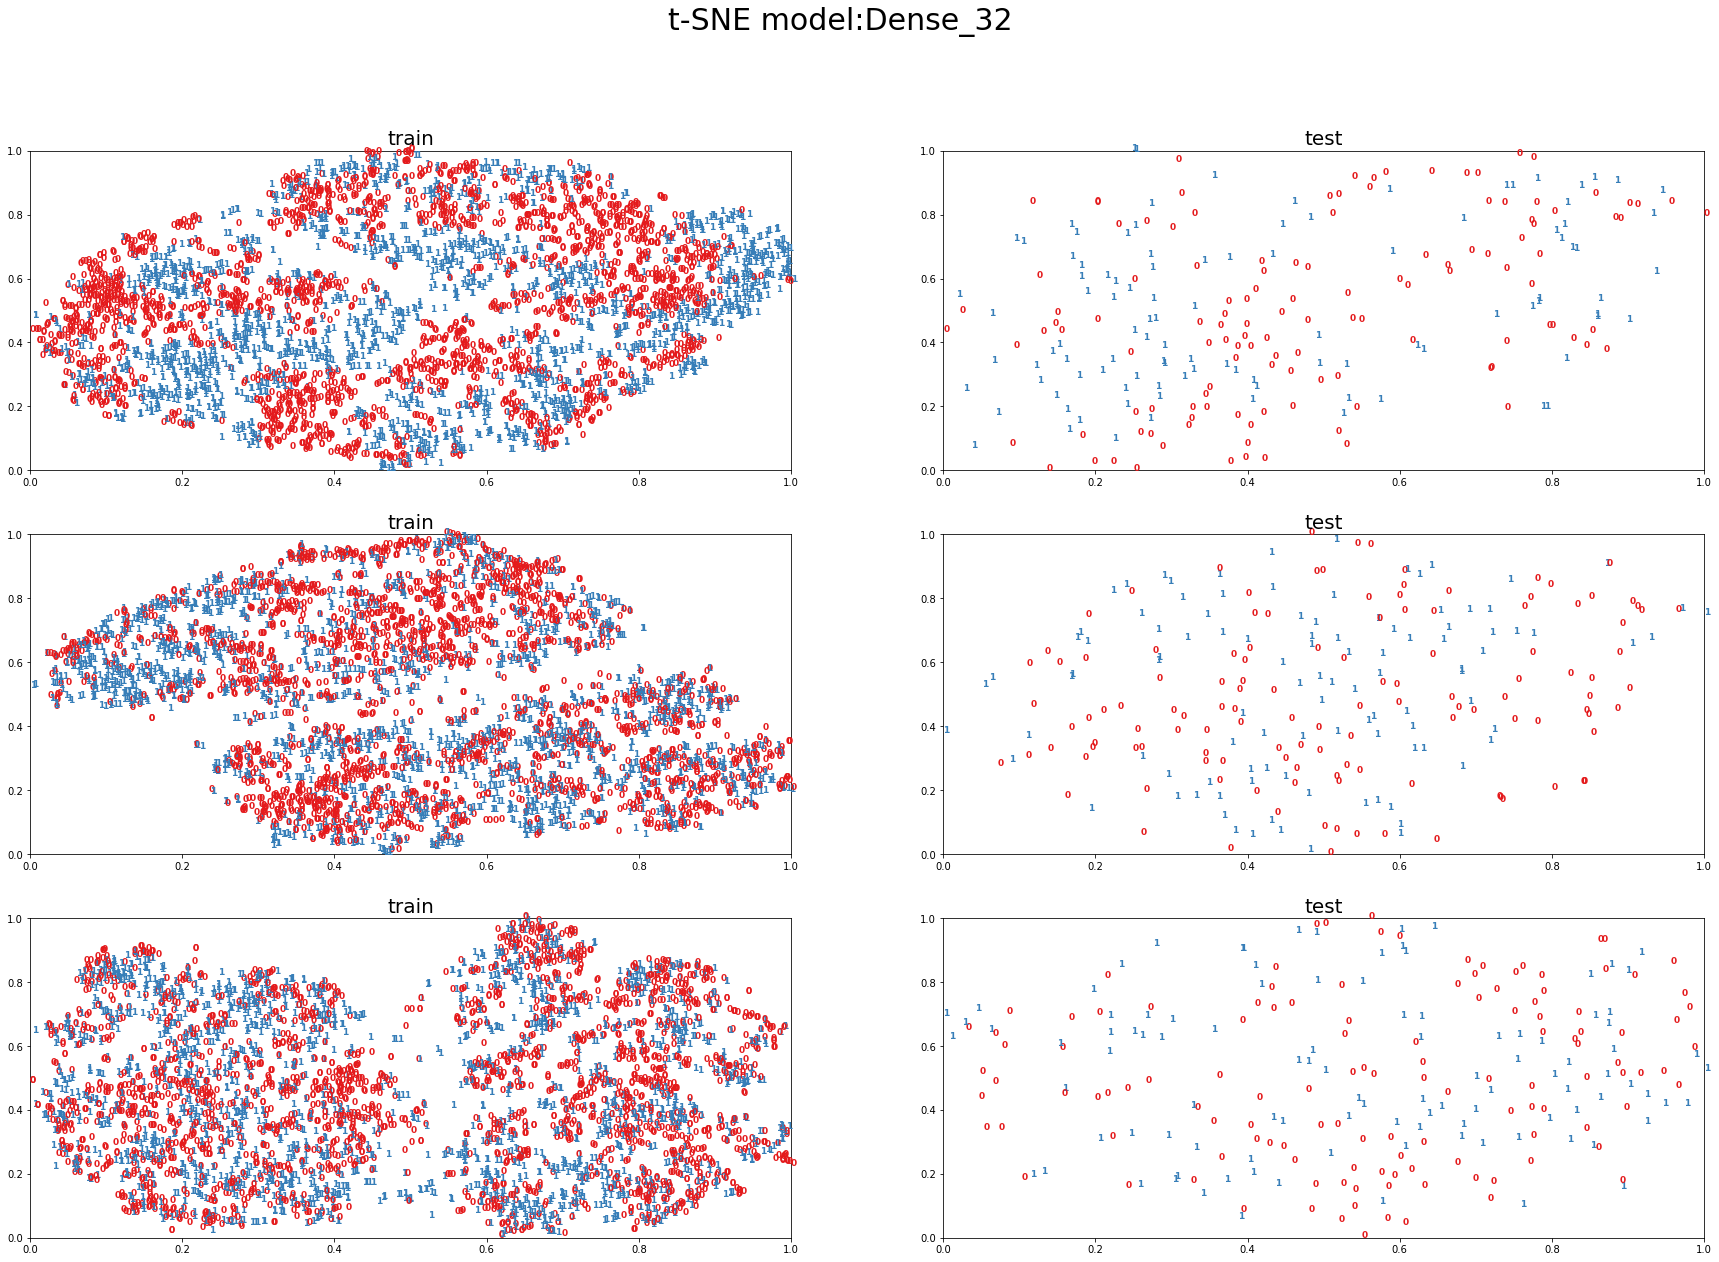

In [43]:
fig = plt.figure(figsize=(30, 20))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

for i, t in zip(range(1,4), ['1', '2a', '2b']):
    i = i*2
    left, right = i-1, i
    '''plot left'''
    X_tsne = sne_dict['data'][t]
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)  # 正規化
    for i in range(X_norm.shape[0]):
        locals()[f'ax{left}'].text(X_norm[i, 0], X_norm[i, 1], str(sne_tr_y[i]), color=plt.cm.Set1(sne_tr_y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
    '''plot right'''
    X_tsne = sne_dict['tar'][t]
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)  # 正規化
    for i in range(X_norm.shape[0]):
        locals()[f'ax{right}'].text(X_norm[i, 0], X_norm[i, 1], str(sne_te_y[i]), color=plt.cm.Set1(sne_te_y[i]), 
             fontdict={'weight': 'bold', 'size': 9})

    locals()[f'ax{left}'].set_title('train', fontsize=20)
    locals()[f'ax{right}'].set_title('test', fontsize=20)

fig.suptitle(f't-SNE model:Dense_{embedding_shape}', fontsize=30)

# save

In [44]:
from pickle import dump
fig.savefig(f'./fig/tsne_dense_{embedding_shape}.png')
file = open(f'./embedding_data/dense_{embedding_shape}', 'wb')
dump(embed_dict, file)